<a href="https://colab.research.google.com/github/pablex72/vi-phenology-analysis-/blob/main/NDVI_value_Stages_FINAL_4_in_ONE_For_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Farm 1 - Tillering NDVI: 0.312396092, Heading NDVI: 0.52780039, Maturity NDVI: 0.32153839
Farm 1
tillering_date 06-09-2022
heading_date 07-14-2022
maturity_date 08-23-2022
Farm 2 - Tillering NDVI: 0.361922198, Heading NDVI: 0.572191618, Maturity NDVI: 0.3515248
Farm 2
tillering_date 05-25-2022
heading_date 06-24-2022
maturity_date 07-19-2022
Farm 3 - Tillering NDVI: 0.272044934, Heading NDVI: 0.427713068, Maturity NDVI: 0.296347631
Farm 3
tillering_date 06-14-2022
heading_date 07-19-2022
maturity_date 08-23-2022
Farm 4 - Tillering NDVI: 0.296212207, Heading NDVI: 0.427165841, Maturity NDVI: 0.271730938


<ipython-input-3-4f6eb8dbb3d2>:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-3-4f6eb8dbb3d2>:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-3-4f6eb8dbb3d2>:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-3-4f6eb8dbb3d2>:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Farm 4
tillering_date 05-30-2022
heading_date 07-04-2022
maturity_date 08-08-2022


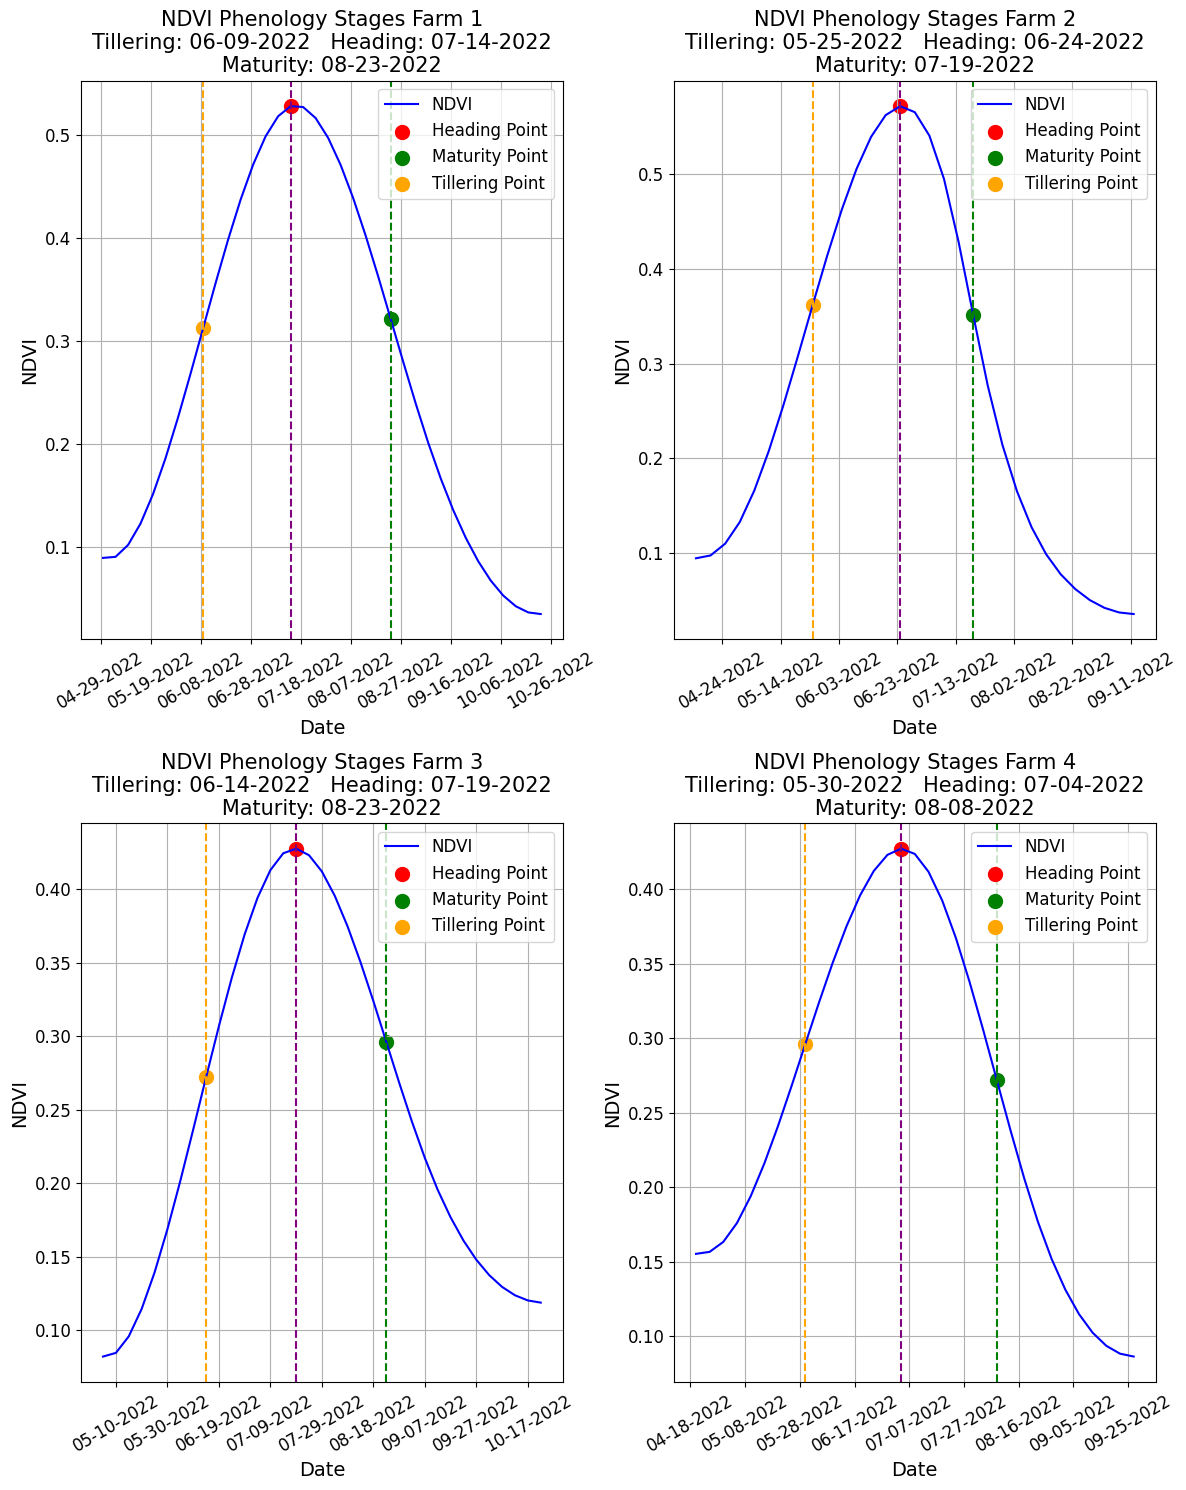

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from matplotlib.dates import date2num, DateFormatter, DayLocator



# List of CSV files
#csv_files = ['/content/one_season_farm1.csv', '/content/one_season_farm2.csv', '/content/one_season_farm3.csv', '/content/one_season_farm4.csv']
csv_files = ['/content/second_season_farm1.csv', '/content/second_season_farm2 .csv', '/content/second_season_farm3 .csv', '/content/second_season_farm4.csv']

results_df = pd.DataFrame(columns=['Farm', 'Tillering', 'Heading', 'Maturity'])

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 15))  # 2x2 subplot grid

for idx, csv_file in enumerate(csv_files):
    # Read data from CSV file
    df = pd.read_csv(csv_file)
    # Parse date and NDVI values
    dates = pd.to_datetime(df['Date'])
    ndvi_values = df['NDVI'].values
    heading_points = 0
    maturity_points = 0
    tillering_points = 0
    first_derivative = np.gradient(ndvi_values)
    # Identify heading points as the index where ndvi_values are maximum
    heading_points = np.argmax(ndvi_values)

    # Identify maturity points as the index where the first derivative is minimum
    maturity_points = np.argmin(first_derivative)

    # Identify tillering points as the index where the first derivative is maximum
    tillering_points = np.argmax(first_derivative)

    # Plot original NDVI and smoothed NDVI
    axs[idx // 2, idx % 2].plot(dates, ndvi_values, label='NDVI', color='blue')

    # Add vertical lines at inflection points
    axs[idx // 2, idx % 2].axvline(x=dates[heading_points], color='purple', linestyle='--', linewidth=1.5)
    axs[idx // 2, idx % 2].axvline(x=dates[maturity_points], color='green', linestyle='--', linewidth=1.5)
    axs[idx // 2, idx % 2].axvline(x=dates[tillering_points], color='orange', linestyle='--', linewidth=1.5)

    tillering_ndvi_value = ndvi_values[tillering_points]
    heading_ndvi_value = ndvi_values[heading_points]
    maturity_ndvi_value = ndvi_values[maturity_points]

    print(f"Farm {idx + 1} - Tillering NDVI: {tillering_ndvi_value}, Heading NDVI: {heading_ndvi_value}, Maturity NDVI: {maturity_ndvi_value}")


    # Highlight the inflection points on the NDVI curve
    axs[idx // 2, idx % 2].scatter(dates[heading_points], ndvi_values[heading_points], color='red', marker='o', s=100, label='Heading Point')
    axs[idx // 2, idx % 2].scatter(dates[maturity_points], ndvi_values[maturity_points], color='green', marker='o', s=100, label='Maturity Point')
    axs[idx // 2, idx % 2].scatter(dates[tillering_points], ndvi_values[tillering_points], color='orange', marker='o', s=100, label='Tillering Point')

    axs[idx // 2, idx % 2].set_title(f'NDVI Phenology Stages {idx + 1}', fontsize=15)

    axs[idx // 2, idx % 2].set_xlabel('Date', fontsize=14)
    axs[idx // 2, idx % 2].set_ylabel('NDVI', fontsize=14)
    axs[idx // 2, idx % 2].legend(prop={"size": 12}, loc="upper right")
    axs[idx // 2, idx % 2].grid()
    axs[idx // 2, idx % 2].tick_params(axis='both', which='major', labelsize=12)
    axs[idx // 2, idx % 2].tick_params(axis='x', rotation=30)
        # Set x-axis ticks to match the data dates and show every 15 days
    axs[idx // 2, idx % 2].xaxis.set_major_locator(DayLocator(interval=20))
    axs[idx // 2, idx % 2].xaxis.set_major_formatter(DateFormatter('%m-%d-%Y'))

    # Increase font size of x-axis and y-axis labels
    axs[idx // 2, idx % 2].set_xlabel("Date", fontsize=14)
    axs[idx // 2, idx % 2].set_ylabel("NDVI", fontsize=14)


    ##############
    # Format the dates as strings
    heading_date_str = dates[heading_points].strftime('%m-%d-%Y')
    maturity_date_str = dates[maturity_points].strftime('%m-%d-%Y')
    tillering_date_str = dates[tillering_points].strftime('%m-%d-%Y')

    # Print the formatted dates
    print('Farm',idx+1)
    print('tillering_date', tillering_date_str)
    print('heading_date', heading_date_str)
    print('maturity_date', maturity_date_str)
    # Append the results to the DataFrame
    results_df = results_df.append({
        'Farm': f'farm{idx + 1}',
        'Tillering': tillering_date_str,
        'Heading': heading_date_str,
        'Maturity': maturity_date_str,
        'Tillering NDVI': tillering_ndvi_value,
        'Heading NDVI': heading_ndvi_value,
        'Maturity NDVI': maturity_ndvi_value
    }, ignore_index=True)
    # Set the title with the formatted dates
    axs[idx // 2, idx % 2].set_title(f'NDVI Phenology Stages Farm {idx+1}\nTillering: {tillering_date_str}   Heading: {heading_date_str}\n   Maturity: {maturity_date_str}', fontsize=15)

# Export the DataFrame to a CSV file
results_df.to_csv('stages-4-farm-season.csv', index=False)
plt.tight_layout()
plt.show()

